In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [7]:
def haversine(lat1, lon1, lat2, lon2):
    
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) + 
         pow(math.sin(dLon / 2), 2) * 
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c * 1000

In [8]:
# Comparison between "perfect" parameters models


histgradient_small = {"name": "histgradient", "mean": 0.3570643876950302, "data": [[0.004219648902245642, 0.0058843653037693846, 0.5685730685369065, 0.49101315639704307, 0.4901151298561247, 0.4703403583872671, 0.4693049864818549]]}
linear_small = {"name": "linear", "mean": 0.4093529762113383, "data": [[0.0040332734890662185, 0.0057522542784869835, 0.6864603356795278, 0.558590525548628, 0.5506085696087126, 0.5306200174826207, 0.5294058573923264]]}
randomforest_small = {"name": "randomforest", "mean": 0.36133856670458847, "data": [[0.00360180577699636, 0.005170450800961564, 0.6254386075046195, 0.4845524565946417, 0.4847087373014776, 0.46329083070512367, 0.46260707824829855]]}

linear_large = {"name": "linear", "mean": 0.3633620281543379, "data": [[0.003690945703899732, 0.004618223694231475, 0.43572592569094626, 0.5367997076301919, 0.5331755147169287, 0.5141953891358498, 0.5153284905083173]]}

# histgradient_large = {"name": "linear", "mean": 0.3625636244321389, "data": [[0.00012347297303198166, 0.00012415697945859308, 0.4380171997462605, 0.5368838187574606, 0.5334214894054506, 0.5141057191561913, 0.5152695140071188]]}
# randomforest_large = {"name": "randomforest", "mean": 0.17148102837565182, "data": [[5.064116784359289e-05, 5.4449459821537725e-05, 0.21863108829126623, 0.25098763188964085, 0.2504878998370961, 0.2397495336914767, 0.24040595429241776]]}

[769.4036251528199, 794.4451585093072, 689.73346895367, 653.3224584179399, 613.2881557416919, 424.58410790653295]


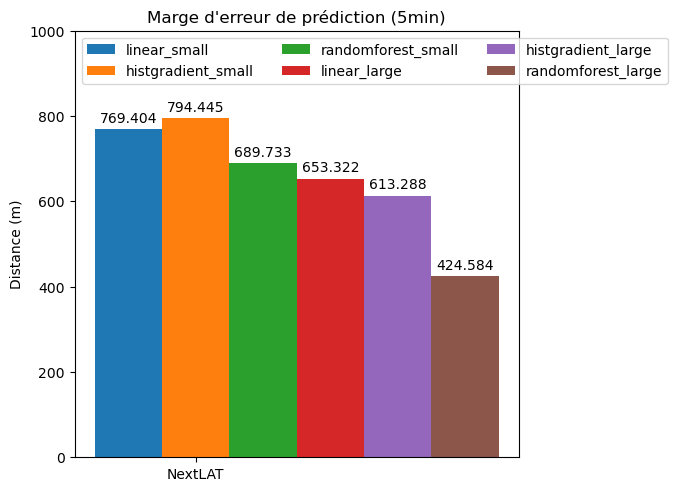

In [22]:
data = {
    'linear_small': np.array(linear_small['data']).mean(axis=0),
    'histgradient_small': np.array(histgradient_small['data']).mean(axis=0),
    'randomforest_small': np.array(randomforest_small['data']).mean(axis=0),
    # 'histgradient_large': np.array(*histgradient_large['data']),
    'linear_large': np.array(*linear_large['data']),
    # 'randomforest_large': np.array(*randomforest_large['data'])
}

data = pd.DataFrame(data)
data["name"] = ["NextLAT", "NextLON", "NextSOG", "NextSinCOG", "NextCosCOG", "NextSinHeading", "NextCosHeading"]
data = data.set_index("name")
data["histgradient_large"] = [0.0039,0.0039,0,0,0,0,0]
data["randomforest_large"] = [0.0027,0.0027,0,0,0,0,0]


fig, ax = plt.subplots(layout='constrained')


x = np.arange(1)
width = 0.2
mult = 0

sizes = data.loc[["NextLAT", "NextLON"]].mean()
sizes = [haversine(u, u, 0, 0) for u in sizes]
print(sizes)



for i in range(len(data.iloc[0])):
    vals = sizes[i]
    name = data.columns[i]
    
    offset = width * mult
    rects = ax.bar(x + offset, vals, width, label=name)
    ax.bar_label(rects, padding=3)
    mult += 1


ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000)
ax.set_ylabel('Distance (m)')
ax.set_title('Marge d\'erreur de prédiction (5min)')
ax.set_xticks(x + width, list(data.index[0:1]))
plt.show()

[769.4036251528199, 794.4451585093072, 689.73346895367, 653.3224584179399, 613.2881557416919, 424.58410790653295, 1425.5036699631373, 2495.4094048936654]


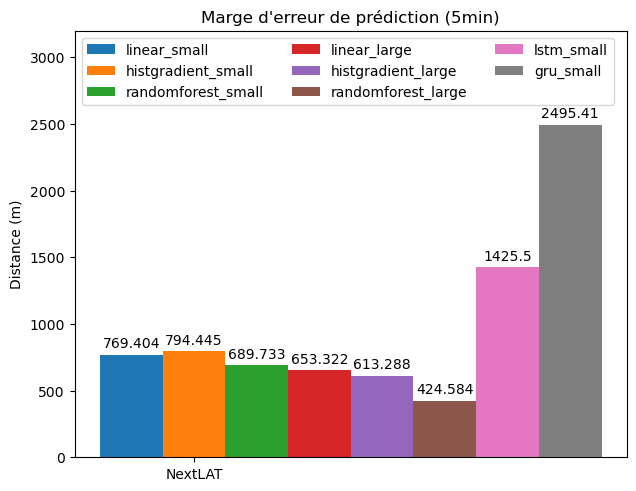

In [23]:
data = {
    'linear_small': np.array(linear_small['data']).mean(axis=0),
    'histgradient_small': np.array(histgradient_small['data']).mean(axis=0),
    'randomforest_small': np.array(randomforest_small['data']).mean(axis=0),
    # 'histgradient_large': np.array(*histgradient_large['data']),
    'linear_large': np.array(*linear_large['data']),
    # 'randomforest_large': np.array(*randomforest_large['data'])
}

data = pd.DataFrame(data)
data["name"] = ["NextLAT", "NextLON", "NextSOG", "NextSinCOG", "NextCosCOG", "NextSinHeading", "NextCosHeading"]
data = data.set_index("name")

data["histgradient_large"] = [0.0039,0.0039,0,0,0,0,0]
data["randomforest_large"] = [0.0027,0.0027,0,0,0,0,0]
data["lstm_small"] = [0.006203390147547169, 0.011926633301489447, 0.7033989416902963, 0.49183493013780977, 0.49323085218673035, 0.47143757995788427, 0.4678504872524621]
data["gru_small"] = [0.013006087602119444, 0.018731348206561704, 0.7410079985235369, 0.4909004440176674, 0.4903735279895057, 0.47561817311303656, 0.46714495823079605]

fig, ax = plt.subplots(layout='constrained')


x = np.arange(1)
width = 0.2
mult = 0

sizes = data.loc[["NextLAT", "NextLON"]].mean()
sizes = [haversine(u, u, 0, 0) for u in sizes]
print(sizes)



for i in range(len(data.iloc[0])):
    vals = sizes[i]
    name = data.columns[i]
    
    offset = width * mult
    rects = ax.bar(x + offset, vals, width, label=name)
    ax.bar_label(rects, padding=3)
    mult += 1


ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 3200)
ax.set_ylabel('Distance (m)')
ax.set_title('Marge d\'erreur de prédiction (5min)')
ax.set_xticks(x + width, list(data.index[0:1]))
plt.show()